In [10]:
!rm df-*-checkpoint.csv

zsh:1: no matches found: df-*-checkpoint.csv


In [11]:
import os
import glob

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [13]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(555, 18)


In [14]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')
# df['Latency'] = df['Latency']
df['Requests'] = df['Requests'].astype(int)

In [15]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [16]:
# Global settings
fontsize = 20
legend_location = "lower right"

# Exp4

In [17]:
df_4.iloc[:,[0,1,2,5,6,10,11,12,-1]].head()

,Latency,Requests,Throughput,Benchmark,Infinite,Vertical,Threads,Connections,ReqSec
0,7.46,500,75085.0,hr,1,1,4,512,500.42
1,7.37,500,14708.0,hr,1,1,4,512,490.00
2,7.34,500,29940.0,hr,1,1,4,512,498.97
3,3.67,500,74959.0,mm,1,1,4,512,499.69
4,3.74,500,14922.0,mm,1,1,4,512,497.42


In [18]:
df_3.shape

(9, 18)

In [19]:
def barplot(df, labels, output="exp-barplot", fontsize=20):
    fig, ax = plt.subplots(figsize=(16,8))

    p1 = ax.bar(labels[0], df['Latency'][0], label=labels[0])
    p2 = ax.bar(labels[1], df['Latency'][1], label=labels[1])
    p3 = ax.bar(labels[2], df['Latency'][2], label=labels[2])
    ax.legend()

    # Label with label_type 'center' instead of the default 'edge'
    ax.bar_label(p1, label_type='edge', fontsize=fontsize)
    ax.bar_label(p2, label_type='edge', fontsize=fontsize)
    ax.bar_label(p3, label_type='edge', fontsize=fontsize)


    plt.ylim(0,15)
    # ax.grid()
    xticks = [int(tick) for tick in ax.get_xticks()]
    ax.set_xlabel('Benchmarks', fontsize=fontsize)
    ax.set_ylabel('Latency (milliseconds)', fontsize=fontsize+5)

    plt.yticks(fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    plt.legend(loc="upper right", fontsize=fontsize+5)

    plt.tight_layout()
    plt.savefig(f"Figures/{output}.png", bbox_inches='tight')

    plt.show()

In [58]:
labels = df_4['Benchmark'].unique()

In [59]:
df_4

,Latency,Requests,Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,7.46,500,75085.0,0,swarm,hr,1,exp4,0,1,1,4,512,150,2.502,17.312,1.598,500.42
1,7.37,500,14708.0,0,swarm,hr,1,exp4,0,1,1,4,512,30,2.510,10.872,1.596,490.00
2,7.34,500,29940.0,0,swarm,hr,1,exp4,0,1,1,4,512,60,2.480,12.464,1.565,498.97
3,3.67,500,74959.0,0,swarm,mm,1,exp4,0,1,1,4,512,150,2.889,69.952,1.258,499.69
4,3.74,500,14922.0,0,swarm,mm,1,exp4,0,1,1,4,512,30,2.830,21.776,0.607,497.42
5,3.70,500,29666.0,0,swarm,mm,1,exp4,0,1,1,4,512,60,2.842,23.184,0.689,494.42
6,5.97,500,74959.0,0,swarm,sn,1,exp4,0,1,1,4,512,150,3.517,10.064,1.329,499.68
7,6.14,500,14925.0,0,swarm,sn,1,exp4,0,1,1,4,512,30,2.523,28.672,1.569,497.23
8,6.00,500,29800.0,0,swarm,sn,1,exp4,0,1,1,4,512,60,3.164,12.520,1.514,496.56


(0.0, 7.6495)

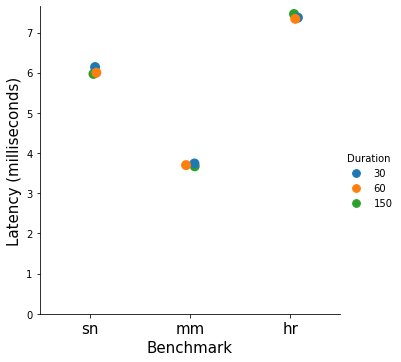

In [47]:
# fig, ax = plt.subplots(figsize=(16,8))
ax = sns.catplot(x="Benchmark", y="Latency", data=df_4, order=["sn","mm","hr"], hue="Duration", s=10)
ax.set_ylabels("Latency (milliseconds)",fontsize=15)
ax.set_xlabels(fontsize=15)
# yticks = [int(tick) for tick in ax.get_yticks()]

ax.set_xticklabels(fontsize=15)
# ax.set_yticklabels(yticks, fontsize=fontsize)
# ax.set_ylim(left=0)
plt.ylim(0)
# ax.axes[0][0].legend(fontsize=15)
# plt.legend()

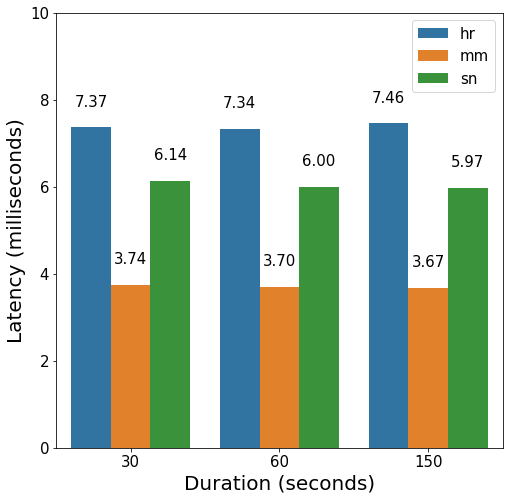

In [57]:
fig, ax = plt.subplots(figsize=(8,8))
labels = ["sn", "mm", "hr"]

# ax = sns.barplot(x='Duration', y='Latency', data=df_4, order=["sn", "mm", "hr"])
ax = sns.barplot(x='Duration', y='Latency', data=df_4, hue="Benchmark")
ax.bar_label(ax.containers[0], label_type='edge', padding=18, fmt='%.2f',fontsize=15)
ax.bar_label(ax.containers[1], label_type='edge', padding=18, fmt='%.2f',fontsize=15)
ax.bar_label(ax.containers[2], label_type='edge', padding=18, fmt='%.2f',fontsize=15)


# set axis and legend
ax.set_xlabel('Duration (seconds)', fontsize=fontsize)
ax.set_ylabel('Latency (milliseconds)', fontsize=fontsize)
ax.legend(fontsize=15)
# ax.set_title('Throughput versus Requests', fontsize=fontsize)

xticks = [int(tick) for tick in ax.get_xticks()]
plt.yticks(fontsize=15)
plt.xticks(xticks, fontsize=15)
plt.ylim(0,10)
plt.savefig("Figures/exp4-duration.png", bbox_inches='tight')